## Define imports

In [10]:
import os
import matplotlib.pyplot as plt
# xarray is a great tool to manipulate data from netcdf files
import xarray as xr
# Wavespectra is built on top of xarray and has tools to help with dealing with spectra
from wavespectra import read_ncswan
%matplotlib inline

In [5]:
datadir = "/tmp/model-data"

## Load gridded data

In [6]:
grid = xr.open_dataset(os.path.join(datadir, "weuro-grid.nc"))
grid

<xarray.Dataset>
Dimensions:    (latitude: 26, longitude: 37, time: 249)
Coordinates:
  * latitude   (latitude) float32 48.5 49.0 49.5 50.0 ... 59.5 60.0 60.5 61.0
  * longitude  (longitude) float32 -9.5 -9.0 -8.5 -8.0 -7.5 ... 7.0 7.5 8.0 8.5
  * time       (time) datetime64[ns] 2012-01-01 ... 2012-02-01
Data variables:
    botl       (time, latitude, longitude) float32 ...
    depth      (time, latitude, longitude) float32 ...
    dpm        (time, latitude, longitude) float32 ...
    dpmsea     (time, latitude, longitude) float32 ...
    dpmswe     (time, latitude, longitude) float32 ...
    dspr       (time, latitude, longitude) float32 ...
    fspr       (time, latitude, longitude) float32 ...
    hs         (time, latitude, longitude) float32 ...
    hsea       (time, latitude, longitude) float32 ...
    hswe       (time, latitude, longitude) float32 ...
    qb         (time, latitude, longitude) float32 ...
    tm01       (time, latitude, longitude) float32 ...
    tm02       (time, latitude, longitude) float32 ...
    tps        (time, latitude, longitude) float32 ...
    tpssea     (time, latitude, longitude) float32 ...
    tpsswe     (time, latitude, longitude) float32 ...
    xwnd       (time, latitude, longitude) float32 ...
    ywnd       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:             CF-1.5
    Institution:             MetOcean Solutions Ltd
    History:                 Created with agioncmd version 1.5
    Directional_convention:  nautical
    project:                 West Europe
    model:                   41.20A
    run:                     weur

## Load spectra data

In [7]:
spec = read_ncswan(os.path.join(datadir, "weuro-spec.nc"), chunks={"site": 1})
spec

<xarray.Dataset>
Dimensions:  (dir: 36, freq: 32, site: 4, time: 249)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T03:00:00 ... 2012-02-01
  * freq     (freq) float32 0.037 0.0407 0.044770002 ... 0.64562815 0.710191
  * dir      (dir) float32 265.0 255.0 245.00002 235.00002 ... 295.0 285.0 275.0
  * site     (site) int64 1 2 3 4
Data variables:
    lon      (site) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    lat      (site) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    efth     (time, site, freq, dir) float32 dask.array<chunksize=(249, 4, 32, 36), meta=np.ndarray>
    dpt      (time, site) float32 dask.array<chunksize=(249, 4), meta=np.ndarray>
    wspd     (time, site) float32 dask.array<chunksize=(249, 4), meta=np.ndarray>
    wdir     (time, site) float32 dask.array<chunksize=(249, 4), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.5
    Institution:             MetOcean Solutions Ltd
    History:                 Created with agioncmd version 1.5
    Directional_convention:  nautical
    project:                 West Europe
    model:                   41.20A
    run:                     weur

## Example plotting snapshot from grid

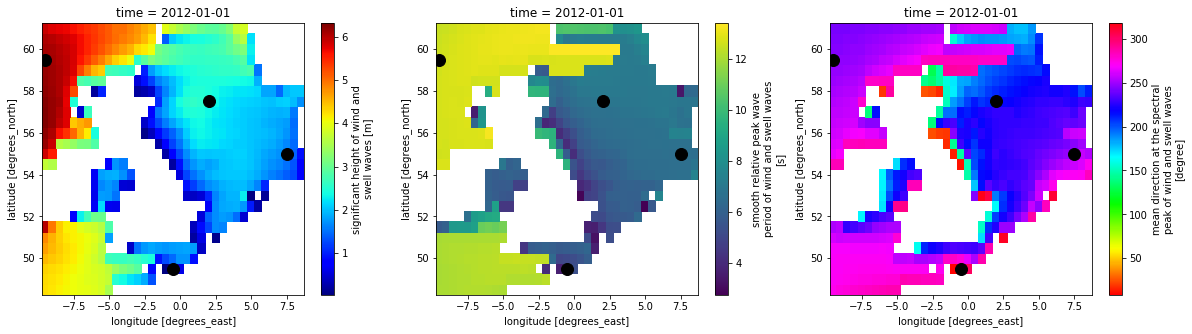

In [35]:
dset = grid.sel(time="2012-01-01 00:00:00")
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

dset.hs.plot(ax=ax1, cmap="jet")
dset.tps.plot(ax=ax2, cmap="viridis")
dset.dpm.plot(ax=ax3, cmap="hsv")

# Show spectra locations on top of maps
for ax in [ax1, ax2, ax3]:
    ax.plot(spec.lon.values, spec.lat.values, 'ok', markersize=12)

## Plotting timeseries from grid

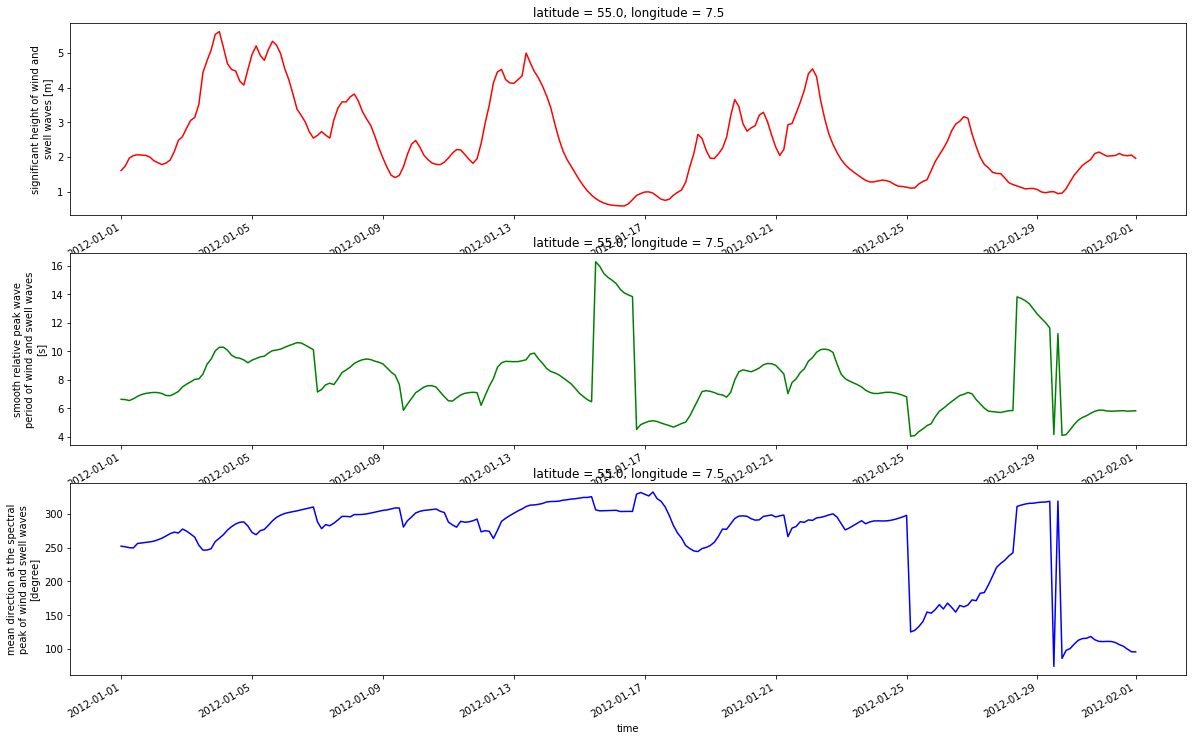

In [20]:
dset = grid.sel(longitude=7.5, latitude=55, method="nearest")
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

dset.hs.plot(ax=ax1, color="red")
dset.tps.plot(ax=ax2, color="green")
dset.dpm.plot(ax=ax3, color="blue")

## Plotting daily spectra from a single site

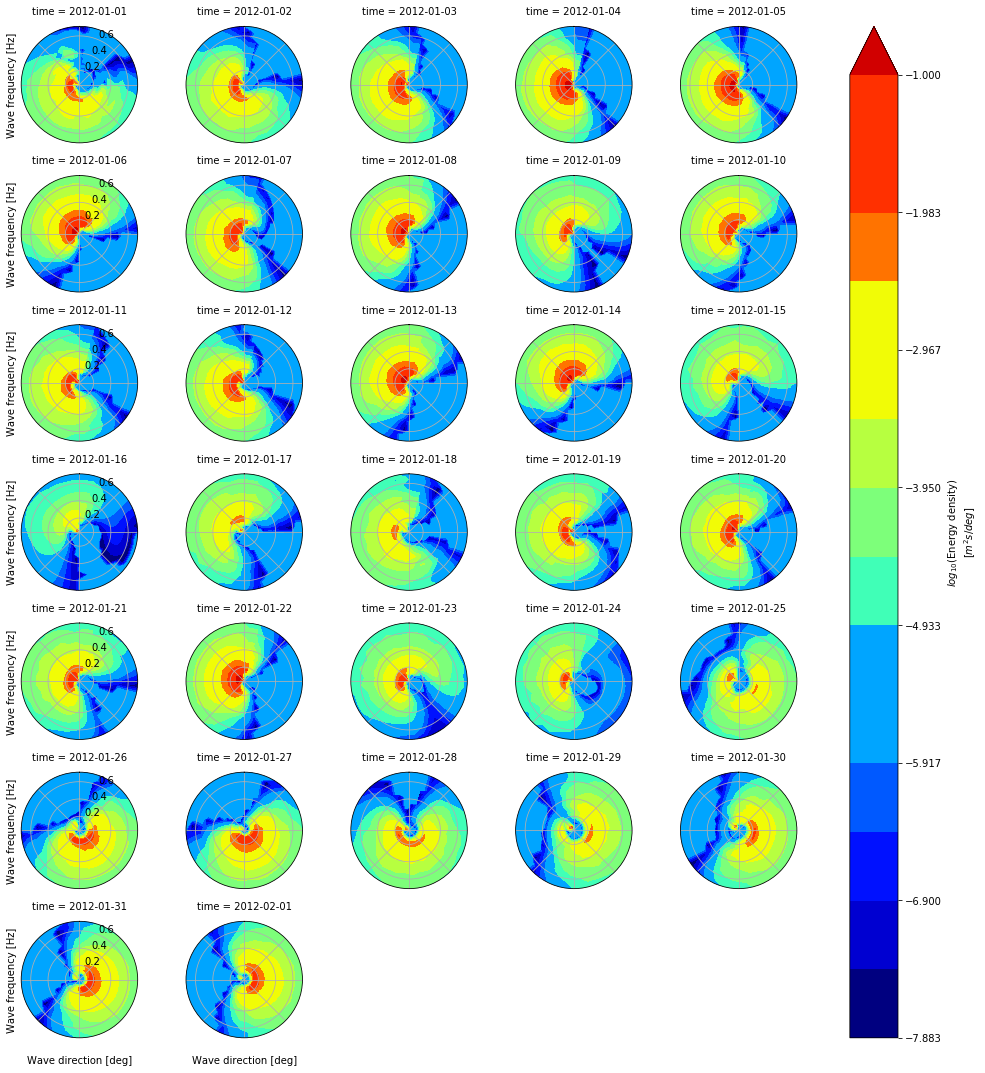

In [28]:
dset = spec.isel(site=0, time=slice(None, None, 8)).load()
dset.spec.plot.contourf(col="time", col_wrap=5, figsize=(15,15), levels=15, cmap="jet", as_log10=True, vmax=-1)

## Calculate Hs from spectra and compare it against Hs from the gridded output
Notice Hs is not a variable in the spectra dataset but we are calculating it using wavespectra library

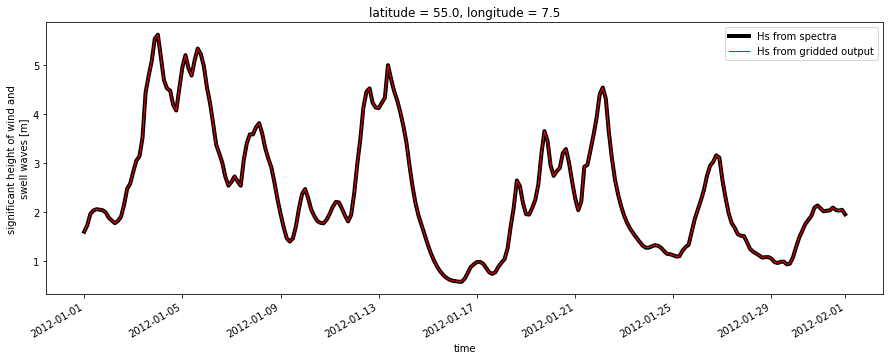

In [31]:
lon = spec.lon.values[0]
lat = spec.lat.values[0]

hs_spec = spec.isel(site=0).spec.hs()
hs_grid = grid.hs.sel(longitude=lon, latitude=lat, method="nearest")

fig = plt.figure(figsize=(15,5))
hs_spec.plot(linewidth=4, color="k", label="Hs from spectra")
hs_grid.plot(linewidth=1, color="r", label="Hs from gridded output")
plt.legend()